In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
data=pd.read_csv("/content/water_dataX.csv",encoding='ISO-8859-1',low_memory=False)
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [ ]:
data.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [ ]:
data.shape

(1991, 12)

In [ ]:
data.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of       STATION CODE  LOCATIONS  STATE   Temp  D.O. (mg/l)     PH  \
0            False      False  False  False        False  False   
1            False      False  False  False        False  False   
2            False      False  False  False        False  False   
3            False      False  False  False        False  False   
4            False      False  False  False        False  False   
...            ...        ...    ...    ...          ...    ...   
1986         False      False  False  False        False  False   
1987         False      False  False  False        False  False   
1988         False      False  False  False        False  False   
1989         False      False  False  False        False  False   
1990         False      False  False  False        False  False   

      CONDUCTIVITY (µmhos/cm)  B.O.D. (mg/l)  \
0                       False          False   
1                       False        

In [ ]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [ ]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [ ]:
data["Temp"]=pd.to_numeric(data["Temp"],errors='coerce')
data["D.O. (mg/l)"]=pd.to_numeric(data["D.O. (mg/l)"],errors='coerce')
data["PH"]=pd.to_numeric(data["PH"],errors='coerce')
data["CONDUCTIVITY (µmhos/cm)"]=pd.to_numeric(data["CONDUCTIVITY (µmhos/cm)"],errors='coerce')
data["B.O.D. (mg/l)"]=pd.to_numeric(data["B.O.D. (mg/l)"],errors='coerce')
data["NITRATENAN N+ NITRITENANN (mg/l)"]=pd.to_numeric(data["NITRATENAN N+ NITRITENANN (mg/l)"],errors='coerce')
data["TOTAL COLIFORM (MPN/100ml)Mean"]=pd.to_numeric(data["TOTAL COLIFORM (MPN/100ml)Mean"],errors='coerce')

In [ ]:
data.drop(["FECAL COLIFORM (MPN/100ml)"],axis=1,inplace=True)

In [ ]:
data=data.rename(columns={'D.O. (mg/l)':'do'})
data=data.rename(columns={'PH':'ph'})
data=data.rename(columns={'CONDUCTIVITY (µmhos/cm)':'co'})
data=data.rename(columns={'B.O.D. (mg/l)':'bod'})
data=data.rename(columns={'NITRATENAN N+ NITRITENANN (mg/l)':'na'})
data=data.rename(columns={'TOTAL COLIFORM (MPN/100ml)Mean':'tc'})
data=data.rename(columns={'LOCATIONS':'location'})
data=data.rename(columns={'STATION CODE':'station'})
data=data.rename(columns={'STATE':'state'})

In [ ]:
data.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,5500.0,2014


In [ ]:
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)
                                 else(80 if (8.6>=x>=8.5) or (6.9>=x>=6.8)
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7)
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                                else 0)))))


data['ndo']=data.do.apply(lambda x: (100 if (x>=6)
                                  else(80 if (6>=x>=5.1)
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3)
                                              else 0)))))

data['nco']=data.tc.apply(lambda x: (100 if (5>=x>=0)
                                          else(80 if (50>=x>=5)
                                            else(60 if (500>=x>=50)
                                              else(40 if (10000>=x>=500)
                                                else 0)))))


data['nbdo']=data.bod.apply(lambda x: (100 if (3>=x>=0)
                                          else(80 if (6>=x>=3)
                                            else(60 if (80>=x>=6)
                                              else(40 if (125>=x>=80)
                                                else 0)))))

data['nec']=data.co.apply(lambda x: (100 if (75>=x>=0)
                                          else(80 if (150>=x>=75)
                                            else(60 if (225>=x>=150)
                                              else(40 if (300>=x>=225)
                                                else 0)))))

data['nna']=data.na.apply(lambda x: (100 if (20>=x>=0)
                                          else(80 if (50>=x>=20)
                                            else(60 if (100>=x>=50)
                                              else(40 if (200>=x>=100)
                                                else 0)))))

In [ ]:
data.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbdo,nec,nna
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,27.0,2014,100,100,80,0,60,100
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,8391.0,2014,100,80,40,100,60,100
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,5330.0,2014,80,100,40,100,60,100
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,8443.0,2014,80,80,40,80,100,100
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,5500.0,2014,100,80,40,100,80,100


In [ ]:
data['wph']=data.npH*0.165
data['wdo']=data.ndo*0.281
data['wbdo']=data.nbdo*0.234
data['wec']=data.nec*0.009
data['wna']=data.nna*0.028
data['wco']=data.nco*0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco
data.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.1,27.0,...,0,60,100,16.5,28.10,0.00,0.54,2.8,22.48,70.42
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,8391.0,...,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,8443.0,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,5500.0,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14


In [ ]:
average=data.groupby('year')['wqi'].mean()
average.head()

year
2003    64.647045
2004    59.890000
2005    72.111429
2006    71.224571
2007    72.549000
Name: wqi, dtype: float64

# DATA VISUALIZATION

In [ ]:
data2 = data.copy()
data2.drop(data2.iloc[:, 0:4], inplace = True, axis = 1)
data2.drop(data2.iloc[:, 7:20], inplace = True, axis = 1)
data2

,do,ph,co,bod,na,tc,year
0,6.7,7.5,203.0,NaN,0.100,27.0,2014
1,5.7,7.2,189.0,2.0,0.200,8391.0,2014
2,6.3,6.9,179.0,1.7,0.100,5330.0,2014
3,5.8,6.9,64.0,3.8,0.500,8443.0,2014
4,5.8,7.3,83.0,1.9,0.400,5500.0,2014
...,...,...,...,...,...,...,...
1986,7.9,738.0,7.2,2.7,0.518,202.0,2003
1987,7.5,585.0,6.3,2.6,0.155,315.0,2003
1988,7.6,98.0,6.2,1.2,NaN,570.0,2003
1989,7.7,91.0,6.5,1.3,NaN,562.0,2003


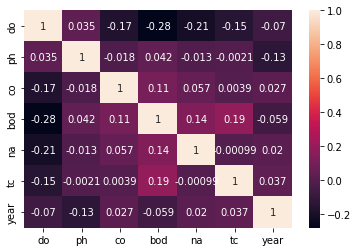

In [ ]:
import seaborn as sns

sns.heatmap(data2.corr(), annot = True)

Text(0, 0.5, 'Year')

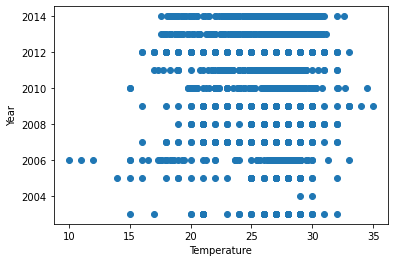

In [ ]:
plt.scatter(data["Temp"], data["year"])
plt.xlabel("Temperature")
plt.ylabel("Year")

Text(0, 0.5, 'Year')

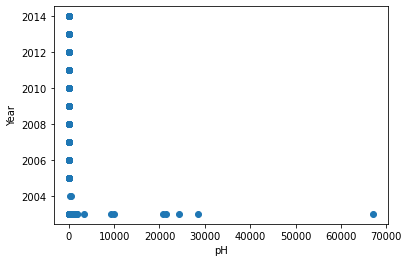

In [ ]:
plt.scatter(data["ph"], data["year"])
plt.xlabel("pH")
plt.ylabel("Year")

Text(0, 0.5, 'pH')

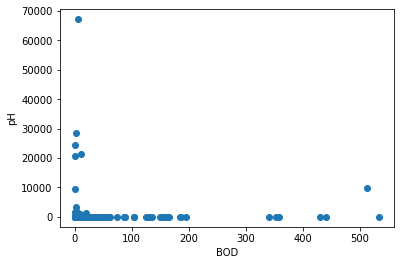

In [ ]:
plt.scatter(data["bod"], data["ph"])
plt.xlabel("BOD")
plt.ylabel("pH")

Text(0, 0.5, 'DO')

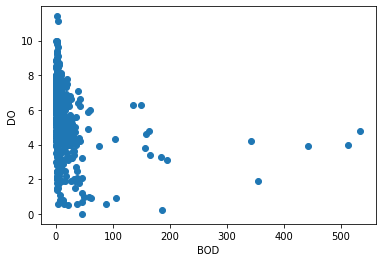

In [ ]:
plt.scatter(data["bod"], data["do"])
plt.xlabel("BOD")
plt.ylabel("DO")

In [ ]:
# sns.pairplot(data2)